Реализация методов вычисления определенного интеграла для f(x) = 2 cos(2.5x) exp(x/3) + 4 sin(3.5x) exp(−3x) + x, 
a = 1.5, b = 3.3, α = 1/3, β = 0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cmath import sqrt
import cmath

In [2]:
from math import cos, exp, sin, acos, pi, log
def f(x):
    return 2*cos(2.5*x)*exp(x/3)+4*sin(3.5*x)*exp(-3*x)+x
a = 1.5
b = 3.3
alpha = 1/3
beta = 0

J_true = 7.258002984374563 # "истинное" значение интеграла

# 1. Квадратурные формулы Ньютона-Котса и Гаусса

##  1.1 Составные квадратурные формулы

Реализация методов вычисления определенного интеграла с использованием составных квадратурных формул: средних и левых прямоугольников, трапеции, Симпсона

### Формула средних прямоугольников

In [3]:
def mean_rectangles(k=50):
    nodes = [a+(l-1)*(b-a)/(k-1) for l in range(1, k+1)]
    J = 0
    h = nodes[1] - nodes[0]
    for i in range(len(nodes)-1):
        J += h*f((nodes[i]+nodes[i+1])/2)
    return J

In [4]:
mean_rectangles(500)

7.258013087085679

In [5]:
def graph(method):
    errors = []
    for j in range(2, 100):
        errors.append(abs(method(j) - J_true))
    plt.plot(range(2, 100), errors)
    plt.xlabel('nodes')
    plt.ylabel('error')
    plt.title('{}'.format(method))

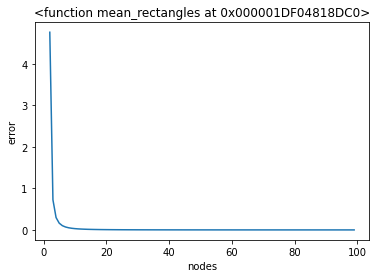

In [6]:
graph(mean_rectangles)

### Формула левых прямоугольников

In [7]:
def left_rectangles(k):
    nodes = [a+(l-1)*(b-a)/(k-1) for l in range(1, k+1)]
    J = 0
    h = nodes[1] - nodes[0]
    for i in range(len(nodes)-1):
        J += h*f(nodes[i])
    return J

In [8]:
left_rectangles(500)

7.253967872470877

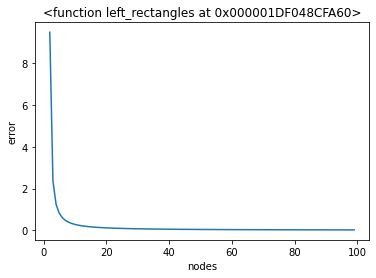

In [9]:
graph(left_rectangles)

### Формула трапеций

In [10]:
def trapezoid(k=50):
    nodes = [a+(l-1)*(b-a)/(k-1) for l in range(1, k+1)]
    J = 0
    h = nodes[1] - nodes[0]
    for i in range(len(nodes)-1):
        J += h/2 * (f(nodes[i])+f(nodes[i+1]))
    return J

In [11]:
trapezoid(500)

7.25798277897152

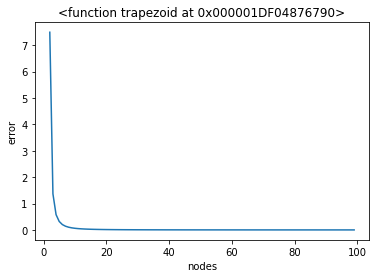

In [12]:
graph(trapezoid)

### Формула Симпсона

In [13]:
def simpson(k = 50):
    nodes = [a+(l-1)*(b-a)/(k-1) for l in range(1, k+1)]
    J = 0
    h = nodes[1] - nodes[0]
    for i in range(len(nodes)-1):
        J += h/6 * (f(nodes[i])+4*f((nodes[i]+nodes[i+1])/2)+f(nodes[i+1]))
    return J

In [14]:
simpson(500)

7.2580029843809655

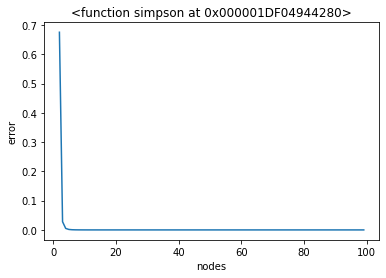

In [15]:
graph(simpson)

Text(0, 0.5, 'error')

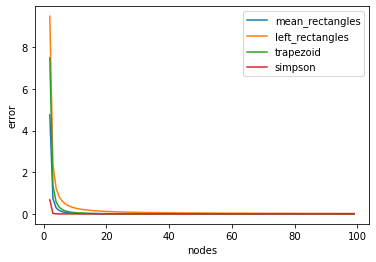

In [16]:
errors = []
for j in range(2, 100):
    errors.append(abs(mean_rectangles(j) - J_true))
plt.plot(range(2, 100), errors, label = 'mean_rectangles')
errors = []
for j in range(2, 100):
    errors.append(abs(left_rectangles(j) - J_true))
plt.plot(range(2, 100), errors, label = 'left_rectangles')
errors = []
for j in range(2, 100):
    errors.append(abs(trapezoid(j) - J_true))
plt.plot(range(2, 100), errors, label = 'trapezoid')
errors = []
for j in range(2, 100):
    errors.append(abs(simpson(j) - J_true))
plt.plot(range(2, 100), errors, label = 'simpson')
plt.legend()
plt.xlabel('nodes')
plt.ylabel('error')

## 1.2 Cоставные квадратурные формулы на базе 3-x-точечных формул Ньютона-Котса и Гаусса

In [17]:
def p(x):
    return (x-a)**(-alpha)*(b-x)**(-beta)
def F(x):
    return f(x)*p(x)
J2_true = 7.07703

### Формула Гаусса

In [18]:
def metod_otr(A, b):
    n = len(b)
    Q = np.eye(n)
    R = np.copy(A)
    for i in range(n-1):
        # строим w
        y = np.zeros(n-i)  # n-i-й столбец матрицы R
        for j in range(i, n):
            y[j-i]=R[j][i]
        #print('y= ', y)
        z = np.zeros(n-i)
        z[0] = 1  # z - орт е1
        #print('z=', z)
        alpha = np.linalg.norm(y)
        #print('a*z=', alpha*z)
        w = (y-alpha*z)/np.linalg.norm(y-alpha*z)
        #print('w=', w)
        #print('w norm =', np.linalg.norm(w))
        
        # строим Q, R
        W = np.eye(n-i)  # W= w*wT - матрица
        for j in range(n-i):
            for k in range(n-i):
                W[j][k] = w[j]*w[k]
        #print('W=', W)
        Q_small = np.eye(n-i)-2*W
        R_small = np.zeros((n-i, n-i))
        for j in range(i, n):
            for k in range(i, n):
                R_small[j-i][k-i] = R[j][k]
        #print('Q_small=', Q_small)
        #print('R_small=', R_small)     
        R_small = np.dot(Q_small,R_small)
        #print('R_small=', R_small)
        # Q new, размера nxn
        Q_new = np.eye(n)
        if (i==0):
            R = np.eye(n)
        for j in range(i, n):
            for k in range(i, n):
                Q_new[j][k] = Q_small[j-i][k-i]
                R[j][k] = R_small[j-i][k-i]           
        #print('Q_new=', Q_new)
        #print('R=', R)
        Q = np.dot(Q, Q_new)
        #print('Q=', Q)
        #print('QR=', np.dot(Q,R))
        #print()
    # обратный ход
    y = np.dot(np.transpose(Q),b)
    x = np.copy(y)
    for i in range(n-1, -1, -1):
        for j in range(n-2, i-1, -1):
            x[i] -= x[j+1]*R[i][j+1]
        x[i]/=R[i][i]
    return x

In [19]:
def Gauss_mal(x1, x2):
    # вычислим моменты
    mu_0 = ((x2 - a)**(1 - alpha) - (x1 - a)**(1 - alpha)) / (1 - alpha)
    mu_1 = ((x2 - a)**(2 - alpha) - (x1 - a)**(2 - alpha))/ (2 - alpha) + a*mu_0
    mu_2 = ((x2 - a)**(3 - alpha) - (x1 - a)**(3 - alpha)) / (3 - alpha) + 2*a*mu_1 - a**2*mu_0
    mu_3 = ((x2 - a)**(4 - alpha) - (x1 - a)**(4 - alpha)) / (4 - alpha) + 3*a*mu_2 - 3*a**2*mu_1 + a**3*mu_0
    mu_4 = ((x2 - a)**(5 - alpha) - (x1 - a)**(5 - alpha)) / (5 - alpha) + 4*a*mu_3 - 6*a**2*mu_2 + 4*a**3*mu_1 - a**4*mu_0
    mu_5 = ((x2 - a)**(6 - alpha) - (x1 - a)**(6 - alpha)) / (6 - alpha) + 5*a*mu_4 - 10*a**2*mu_3 + 10*a**3*mu_2 - 5*a**4*mu_1 + a**5*mu_0
    mu = [mu_0, mu_1, mu_2, mu_3, mu_4, mu_5]
    # решим СЛАУ A_*A = mu_
    A_ = [[mu_0, mu_1, mu_2], [mu_1, mu_2, mu_3], [mu_2, mu_3, mu_4]]
    mu_ = [-mu_3, -mu_4, -mu_5]
    A = metod_otr(A_, mu_)
    # определим узловой многочлен, вычислим его корни по формуле Кардано
    def w(x):
        return x**3 + A[2]*x**2 + A[1]*x + A[0]
    a_ = 1
    b_ = A[2] 
    c_ = A[1]
    d_ = A[0]
    p = (3*a_*c_ - b_**2)/(3*a_**2)
    q = (2*b_**3 - 9*a_*b_*c_ + 27*a_**2*d_)/(27*a_**3)
    Q = (p/3)**3 + (q/2)**2
    # Q<0 => три вещественных корня
    if Q < 0:
        alpha_ = (-q/2 + sqrt(Q)*pi)
        beta_ = (-q/2 - sqrt(Q)*pi)
        y1 = alpha_ + beta_ - b_/3
        y2 = -(alpha_ + beta_)/2 + 1j*(alpha_ - beta_)/2*sqrt(3) - b_/3
        y3 = -(alpha_ + beta_)/2 - 1j*(alpha_ - beta_)/2*sqrt(3) - b_/3
    # 
    x = [y1.real, y2.real, y3.real]
    X = [[1]*3, x, [xi**2 for xi in x]]
    mu = [mu_0, mu_1, mu_2]
    Aj = metod_otr(X, mu)
    return x, Aj
        

In [20]:
def Gauss(n):
    h = (b - a)/n
    res = 0
    for i in range(n):
        x1 = a + i*h
        x2 = x1 + h
        x, Aj = Gauss_mal(x1, x2)
        for j in range(3):
            res += f(x[j])*Aj[j]
    return res

In [21]:
Gauss(100)

7.077026556711644

In [22]:
def graph2(method):
    errors = []
    for j in range(2, 100):
        errors.append(abs(method(j) - J2_true))
    plt.plot(range(2, 100), errors)
    plt.xlabel('nodes')
    plt.ylabel('error')
    plt.title('{}'.format(method))

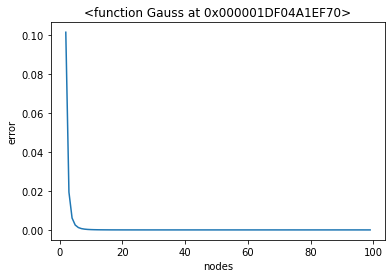

In [23]:
graph2(Gauss)

## Формула Ньютона-Котса

In [24]:
def Newton_Cotes_mal(h):
    res = 0
    z1 = a
    z2 = a + h 
    z12 = (z1 + z2)/2
    n = round((b-a)/h)
    for i in range(n):
        mu0 = (pow((z2 - a), 1 - alpha) - pow((z1 - a), 1 - alpha)) / (1 - alpha)
        mu1 = (pow((z2 - a), 2 - alpha) - pow((z1 - a), 2 - alpha)) / (2 - alpha) + a*mu0
        mu2 = (pow((z2 - a), 3 - alpha) - pow((z1 - a), 3 - alpha)) / (3 - alpha) + 2*a*mu1 - a*a*mu0

        A1 = (mu2 - mu1*(z12 + z2) + mu0*z12*z2) / ((z12 - z1)*(z2 - z1))
        A2 = -(mu2 - mu1*(z1 + z2) + mu0*z1*z2) / ((z12 - z1)*(z2 - z12))
        A3 = (mu2 - mu1*(z12 + z1) + mu0*z12*z1) / ((z2 - z12)*(z2 - z1))
        res += A1*f(z1) + A2*f(z12) + A3*f(z2)
        z1 = z2
        z2 = z2 + h
        z12 = (z1 + z2)/2
    return res

In [25]:
def Newton_Cotes(n):
    h = (b - a) / n
    res = Newton_Cotes_mal(h)
    return res

In [26]:
Newton_Cotes(300)

7.077031438335777

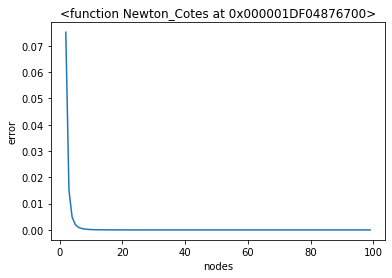

In [27]:
graph2(Newton_Cotes)

Text(0, 0.5, 'error')

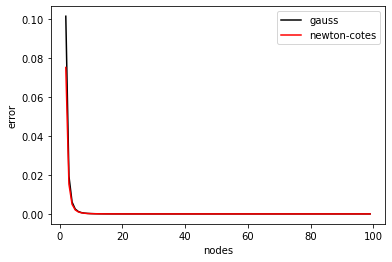

In [28]:
errors_gauss = []
for j in range(2, 100):
    errors_gauss.append(abs(Gauss(j) - J2_true))
errors_newt = []
for j in range(2, 100):
    errors_newt.append(abs(Newton_Cotes(j) - J2_true))
plt.plot(range(2, 100), errors_gauss, 'k', label = 'gauss')
plt.plot(range(2, 100), errors_newt, 'r', label = 'newton-cotes')
plt.legend()
plt.xlabel('nodes')
plt.ylabel('error')

# 2: Методы оценки погрешности составных квадратурных формул

## 2.1 
Вычислить определенный интеграл с заданной точностью 𝜀 = 10−6 c использованием 
составной 3-х-точечной квадратурной формулы Ньютона-Кот(е)са. Погрешность 
оценивать методом Ричардсона. На каждых последовательных трех точках оценивать 
скорость сходимости по правилу Эйткена. Указать длину шага ℎ разбиения интервала 
интегрирования, при котором была достигнута требуемая точность 𝜀.

In [39]:
def Richardson(method, h = b-a):
    Rh = 1
    L = 2
    r = 0
    eps = 10**(-5)
    
    while Rh > eps:
        h1 = h
        h2 = h/L
        h3 = h/L**2
        Sh1 = method(h1)
        Sh2 = method(h2)
        Sh3 = method(h3)
        m = - log(abs((Sh3 - Sh2) / (Sh2 - Sh1)))/log(2)
        print(m)
        Rh1 = abs(Sh2 - Sh1)/(1 - L**(-m))
        Rh2 = abs(Sh2 - Sh1)/(L**m - 1)
        r += 1
        Rh = abs(Rh1)
        h /= L
        print('r= ', r, 'Sh1= ', Sh1, 'Rh = ', Rh1)
    hopt = h*L*(eps/abs(Rh1))**(1/m)
    print('h= ', h*L)
    print('hopt= ', hopt)
    return method(h)
        

In [40]:
def Gauss_h(h):
    res = 0
    x1 = a
    x2 = x1 + h
    while x2 < b:
        x, Aj = Gauss_mal(x1, x2)
        x1 = x2
        x2 += h
        for i in range(3):
            res += f(x[i])*Aj[i]
    return res

In [41]:
Richardson(Gauss_h)

-0.3168105313739746
r=  1 Sh1=  0 Rh =  -10.070841711868425
1.5584942877586954
r=  2 Sh1=  2.4731351106934767 Rh =  4.663886083666685
1.130901344080978
r=  3 Sh1=  5.553607467938718 Rh =  1.924723770454049
14.224426832119843
r=  4 Sh1=  6.599443949967281 Rh =  0.47758562863250853
-10.091790356253956
r=  5 Sh1=  7.077004628510622 Rh =  -2.288315806258358e-08
h=  0.11249999999999999
hopt=  0.06158937305379503


7.077029577296344

In [32]:
h_opt_Gauss = 0.07737421011630186

In [33]:
Richardson(Newton_Cotes_mal)

r=  1 Sh1=  8.28095500967032 Rh =  1.2036293270005411
r=  2 Sh1=  7.152213905826924 Rh =  0.07517370647340503
r=  3 Sh1=  7.081985128764874 Rh =  0.004952927291737715
r=  4 Sh1=  7.077365477007508 Rh =  0.00033399388378940807
r=  5 Sh1=  7.077054627116653 Rh =  2.318654569295838e-05
r=  6 Sh1=  7.077033086878862 Rh =  1.6487032198109603e-06
r=  7 Sh1=  7.077031557463306 Rh =  1.1937371877594153e-07
h=  0.028124999999999997
hopt=  0.04938384795511334


7.077031446806393

In [34]:
def RichardsonOpt(method, h = b-a):
    Rh = 1
    L = 2
    r = 0
    eps = 10**(-6)
    h1 = h
    h2 = h/L
    h3 = h/L**2
    Sh1 = method(h1)
    Sh2 = method(h2)
    Sh3 = method(h3)        
    m = - log(abs((Sh3 - Sh2) / (Sh2 - Sh1)))/log(2)
    Rh1 = abs(Sh2 - Sh1)/(1 - L**(-m))
    Rh2 = abs(Sh2 - Sh1)/(L**m - 1)
    h = h1*L*(eps/abs(Rh1))**(1/m)
    while Rh > eps:
        h1 = h
        h2 = h/L
        h3 = h/L**2
        Sh1 = method(h1)
        Sh2 = method(h2)
        Sh3 = method(h3)        
        m = - log(abs((Sh3 - Sh2) / (Sh2 - Sh1)))/log(2)
        Rh1 = abs(Sh2 - Sh1)/(1 - L**(-m))
        Rh2 = abs(Sh2 - Sh1)/(L**m - 1)
        h = h1*L*(eps/abs(Rh1))**(1/m)
        r += 1
        Rh = abs(Rh2)
        print('r= ', r, 'Sh1= ', Sh1, 'Rh = ', Rh2)
        
    return h1

In [35]:
RichardsonOpt(Gauss_h, h_opt_Gauss)

r=  1 Sh1=  7.075089378831763 Rh =  4.407276433805413e-07


0.08988237870465032